# 1. Data loading and import libs

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
file_path = "/kaggle/input/dataset-flowbert/training_data.csv"
training_data = pd.read_csv(file_path)


In [25]:
# Displaying the first few rows for inspection
training_data.head()


,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [26]:
# Information about data types and missing values
training_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4800 non-null   int64 
 1   sentence    4800 non-null   object
 2   difficulty  4800 non-null   object
dtypes: int64(1), object(2)
memory usage: 112.6+ KB


# 2. Statistical Text Analysis

In [27]:
# Total number of entries and unique difficulty levels
total_entries = training_data.shape[0]
unique_difficulty_levels = training_data['difficulty'].nunique()

# Distribution of sentences by difficulty level
difficulty_distribution = training_data['difficulty'].value_counts()
print(difficulty_distribution)


difficulty
A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: count, dtype: int64


In [28]:
# Calculation of the average sentence length by difficulty level
training_data['sentence_length'] = training_data['sentence'].apply(len)
average_length_by_difficulty = training_data.groupby('difficulty')['sentence_length'].mean()
print(average_length_by_difficulty)

# Calculation of vocabulary diversity
unique_words = set()
training_data['sentence'].str.lower().str.split().apply(unique_words.update)
vocabulary_diversity = len(unique_words) / training_data['sentence'].str.split().apply(len).sum()
print('Vocabulary Diversity:', vocabulary_diversity)


difficulty
A1     39.172202
A2     61.547170
B1     84.582390
B2    120.902778
C1    156.444862
C2    199.612144
Name: sentence_length, dtype: float64
Vocabulary Diversity: 0.22983866344069992


In [29]:
import string

# Function to count the number of punctuations in a sentence
def count_punctuation(text):
    return sum(1 for char in text if char in string.punctuation)

# Calculation of the number of punctuations for each sentence
training_data['punctuation_count'] = training_data['sentence'].apply(count_punctuation)

# Grouping by difficulty level and calculating the average number of punctuations
average_punctuation_by_difficulty = training_data.groupby('difficulty')['punctuation_count'].mean()
print(average_punctuation_by_difficulty)


difficulty
A1    1.739237
A2    2.435220
B1    2.976101
B2    3.459596
C1    4.788221
C2    6.308550
Name: punctuation_count, dtype: float64


In [30]:
# Function to count the number of unique words in a sentence
def count_unique_words(text):
    words = text.lower().split()
    return len(set(words))

# Calculation of the number of unique words for each sentence
training_data['unique_word_count'] = training_data['sentence'].apply(count_unique_words)

# Grouping by difficulty level and calculating the average number of unique words
average_unique_words_by_difficulty = training_data.groupby('difficulty')['unique_word_count'].mean()
print(average_unique_words_by_difficulty)


difficulty
A1     7.150062
A2    10.958491
B1    13.915723
B2    17.516414
C1    21.968672
C2    26.991326
Name: unique_word_count, dtype: float64


# 3. Visualization

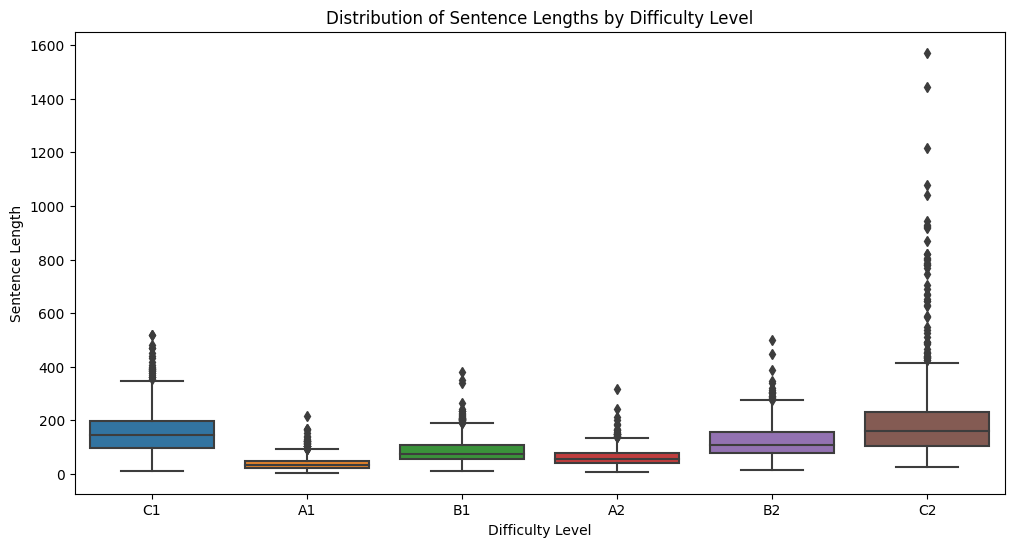

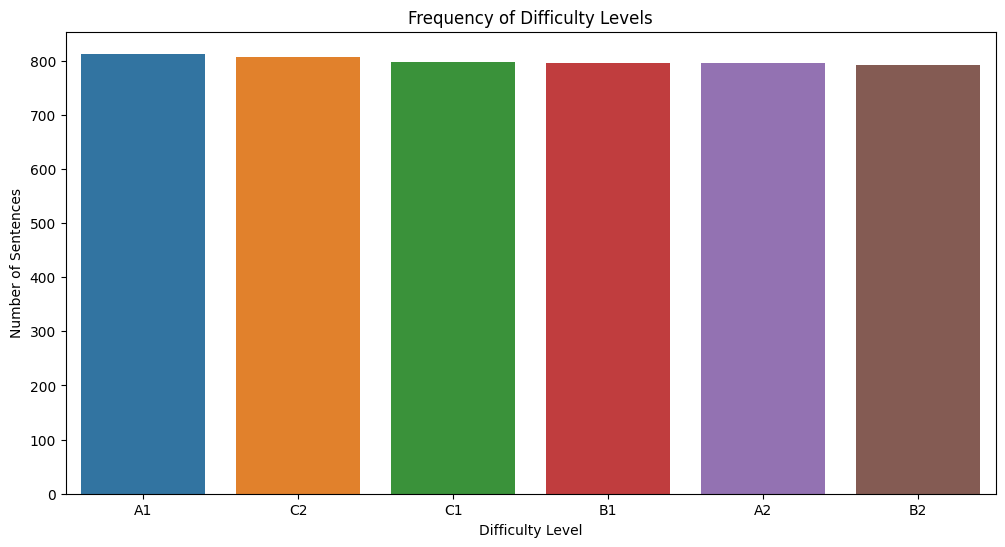

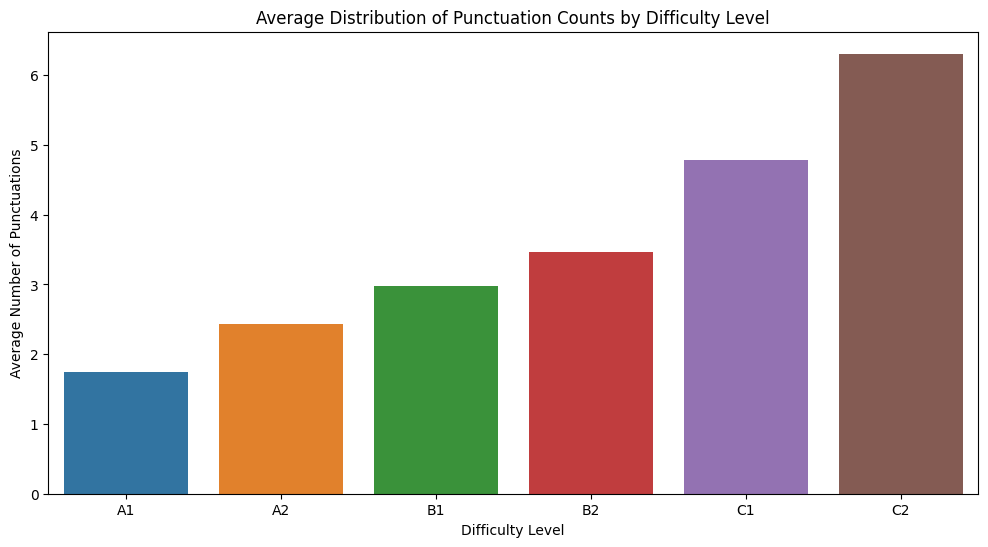

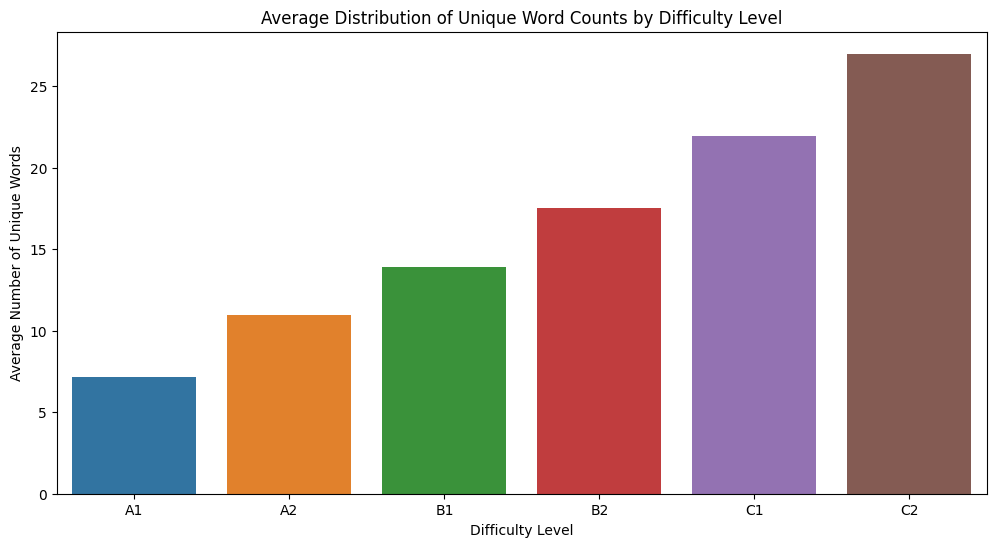

In [31]:
# Distribution of Sentence Lengths by Difficulty Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='difficulty', y='sentence_length', data=training_data)
plt.title('Distribution of Sentence Lengths by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Sentence Length')
plt.show()

# Frequency of Difficulty Levels
plt.figure(figsize=(12, 6))
sns.countplot(x='difficulty', data=training_data, order=difficulty_distribution.index)
plt.title('Frequency of Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Sentences')
plt.show()

# Visualization of the Distribution of Punctuation Counts by Difficulty Level
plt.figure(figsize=(12, 6))
sns.barplot(x=average_punctuation_by_difficulty.index, y=average_punctuation_by_difficulty.values)
plt.title('Average Distribution of Punctuation Counts by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Average Number of Punctuations')
plt.show()

# Visualization of the Distribution of Unique Word Counts by Difficulty Level
plt.figure(figsize=(12, 6))
sns.barplot(x=average_unique_words_by_difficulty.index, y=average_unique_words_by_difficulty.values)
plt.title('Average Distribution of Unique Word Counts by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Average Number of Unique Words')
plt.show()


In [32]:
# Verification for missing values
missing_values = training_data.isnull().sum()
print(missing_values)


id                   0
sentence             0
difficulty           0
sentence_length      0
punctuation_count    0
unique_word_count    0
dtype: int64
